In [1]:
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler,normalize, MinMaxScaler

In [2]:
# Set up credentials
credentials = service_account.Credentials.from_service_account_file("D:\\Mine\\Ready 2024\\Final_Project\\used_cars_platform-ready-project\\dags\\service-account-file.json")
client = bigquery.Client(credentials=credentials)

In [3]:
query = """
SELECT * FROM `ready-data-de24.Landing_ahussien.cars_data`
"""
df = client.query(query).to_dataframe()
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play_or_android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,FIAT,124 Spider Lusso,2020,30830,1.4L I4 16V MPFI SOHC Turbo,1.4,6-Speed Automatic,1,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,0,Black,Black,20500
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,FIAT,500 Pop,2014.0,42000.0,None,None,Automatic,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Nero (Black),Verde Oliva (Olive Green),9999
3,FIAT,500 Base,1953.0,0.0,None,None,None,0.0,Unknown,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tan,Burgundy,19950
4,Toyota,Mirai Base,2021.0,20132.0,None,None,Continuously Variable,0.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BLACK,GRAY,28900


In [4]:
df = df[df['brand'].notnull()]

In [5]:
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play_or_android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,FIAT,124 Spider Lusso,2020,30830,1.4L I4 16V MPFI SOHC Turbo,1.4,6-Speed Automatic,1,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,0,Black,Black,20500
2,FIAT,500 Pop,2014.0,42000.0,None,None,Automatic,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Nero (Black),Verde Oliva (Olive Green),9999
3,FIAT,500 Base,1953.0,0.0,None,None,None,0.0,Unknown,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tan,Burgundy,19950
4,Toyota,Mirai Base,2021.0,20132.0,None,None,Continuously Variable,0.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BLACK,GRAY,28900
5,FIAT,500L Trekking,2014.0,122725.0,None,None,Manual,0.0,Unknown,Front-wheel Drive,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Black,Bianco (White),8746


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 0 to 4780
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   brand                           4780 non-null   object
 1   model                           4780 non-null   object
 2   year                            4780 non-null   object
 3   mileage                         4780 non-null   object
 4   engine                          4774 non-null   object
 5   engine_size                     4496 non-null   object
 6   transmission                    4763 non-null   object
 7   automatic_transmission          4780 non-null   object
 8   fuel_type                       4780 non-null   object
 9   drivetrain                      4780 non-null   object
 10  min_mpg                         4034 non-null   object
 11  max_mpg                         4034 non-null   object
 12  damaged                         4726 non-null   

In [7]:
df.describe().T

,count,unique,top,freq
brand,4780,26,MINI,238
model,4780,1909,Romeo Giulia Ti,40
year,4780,47,2020.0,637
mileage,4780,4670,14140.0,3
engine,4774,569,2.0L I4 16V GDI DOHC Turbo,583
engine_size,4496,50,2.0,1193
transmission,4763,97,8-Speed Automatic,1339
automatic_transmission,4780,4,1.0,4391
fuel_type,4780,7,Gasoline,4328
drivetrain,4780,5,Four-wheel Drive,2707


In [8]:
df.isna().sum()

brand                               0
model                               0
year                                0
mileage                             0
engine                              6
engine_size                       284
transmission                       17
automatic_transmission              0
fuel_type                           0
drivetrain                          0
min_mpg                           746
max_mpg                           746
damaged                            54
first_owner                        88
personal_using                     56
turbo                               0
alloy_wheels                        0
adaptive_cruise_control             0
navigation_system                   0
power_liftgate                      0
backup_camera                       0
keyless_start                       0
remote_start                        0
sunroof_or_moonroof                 0
automatic_emergency_braking         0
stability_control                   0
leather_seat

In [9]:
df.shape

(4780, 36)

In [10]:
df.loc[(df['price'] == 'ot Priced') | (df["price"].isnull()), 'price'] = '0.0'
"ot Priced" in df['price'].values

False

In [11]:
categorical_features = ["automatic_transmission",
  "fuel_type", "drivetrain","damaged", "first_owner", "personal_using",
    "turbo", "alloy_wheels", "adaptive_cruise_control", "navigation_system",
    "power_liftgate", "backup_camera", "keyless_start", "remote_start",
    "sunroof_or_moonroof", "automatic_emergency_braking", "stability_control",
    "leather_seats", "memory_seat", "third_row_seating", "apple_car_play_or_android_auto",
    "bluetooth", "usb_port", "heated_seats"]

In [12]:
numerical_features = [
    "mileage","engine_size","min_mpg", "max_mpg","price"
]

In [13]:
text_features = ['brand','model','year','engine',"transmission","automatic_transmission",
  "fuel_type", "drivetrain","damaged", "first_owner", "personal_using",
    "turbo", "alloy_wheels", "adaptive_cruise_control", "navigation_system",
    "power_liftgate", "backup_camera", "keyless_start", "remote_start",
    "sunroof_or_moonroof", "automatic_emergency_braking", "stability_control",
    "leather_seats", "memory_seat", "third_row_seating", "apple_car_play_or_android_auto",
    "bluetooth", "usb_port", "heated_seats","exterior_color","interior_color"]

In [14]:
for i in text_features:
    df.loc[(df[i] == '1'), i] = '1.0'
    df.loc[(df[i] == '0'), i] = '0.0'
    df.loc[(df[i].isnull()) | (df[i] == ''), i] = 'Unknown'

In [15]:
df.loc[(df['engine'].isnull()) | (df['engine'] == ''), 'engine'] = 'Unknown'

In [16]:
for i in numerical_features:
    df.loc[(df[i] == '1'), i] = '1.0'
    df.loc[(df[i] == '0'), i] = '0.0'
    df.loc[(df[i].isnull()), i] = '0.0'

In [17]:
df.isna().sum()

brand                             0
model                             0
year                              0
mileage                           0
engine                            0
engine_size                       0
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                           0
max_mpg                           0
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof_or_moonroof               0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                 

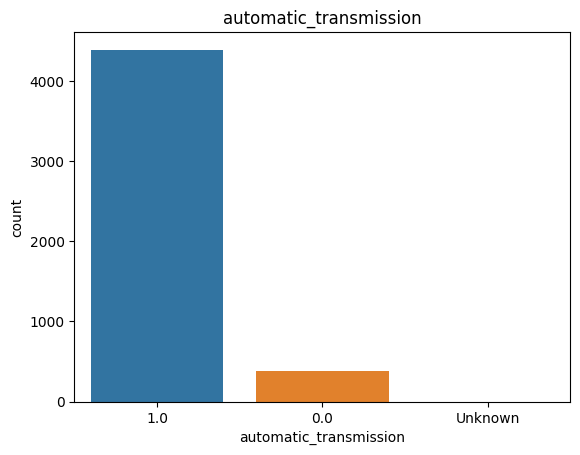

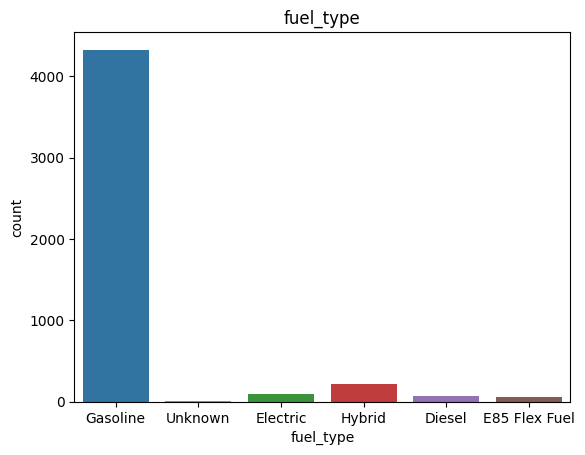

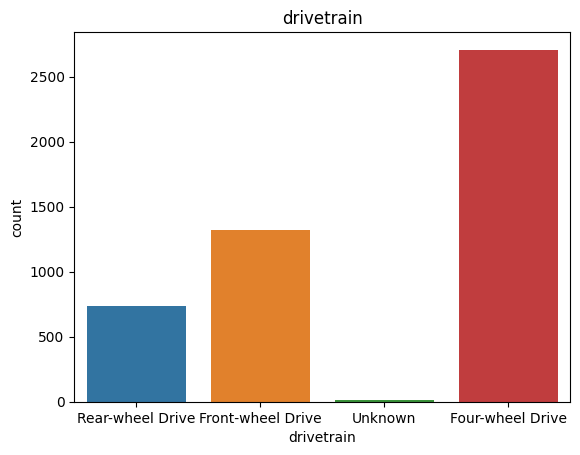

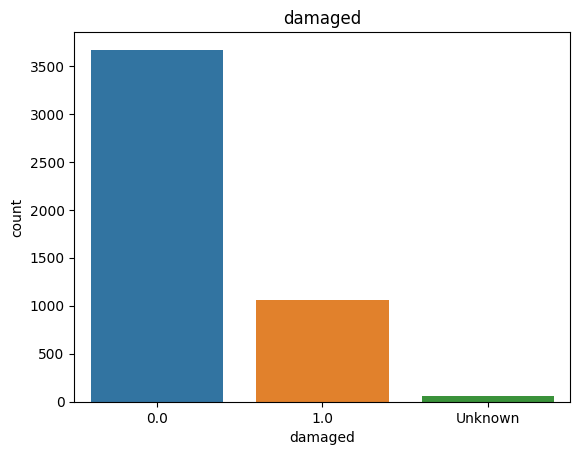

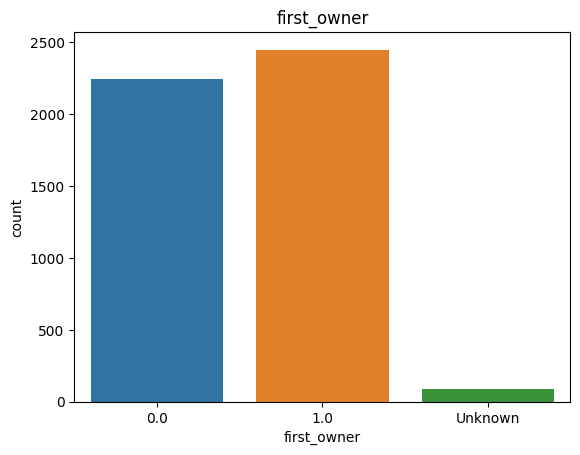

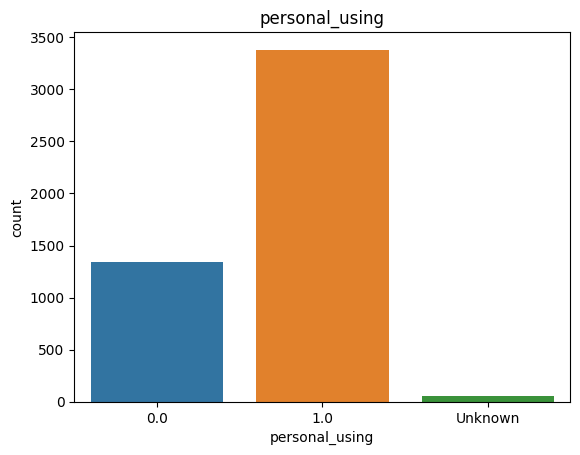

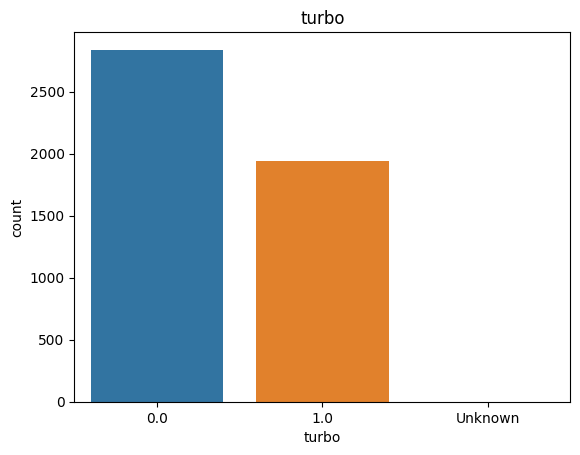

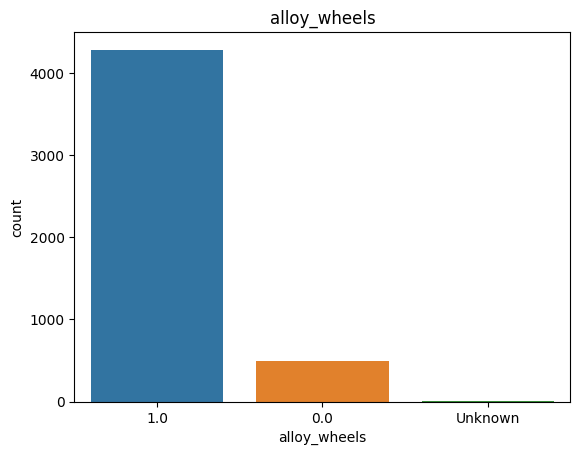

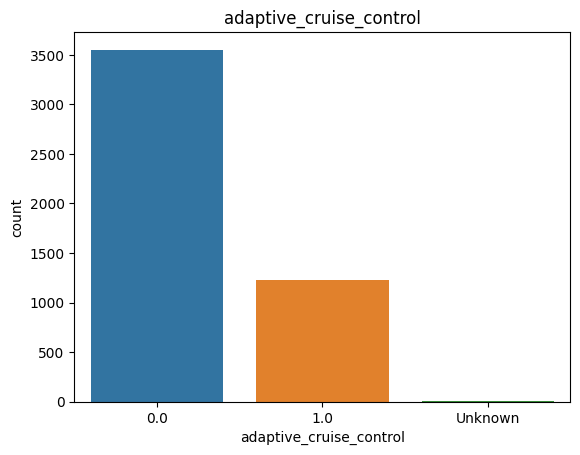

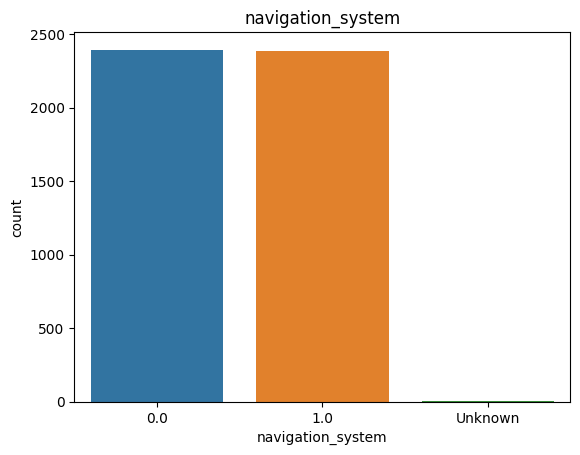

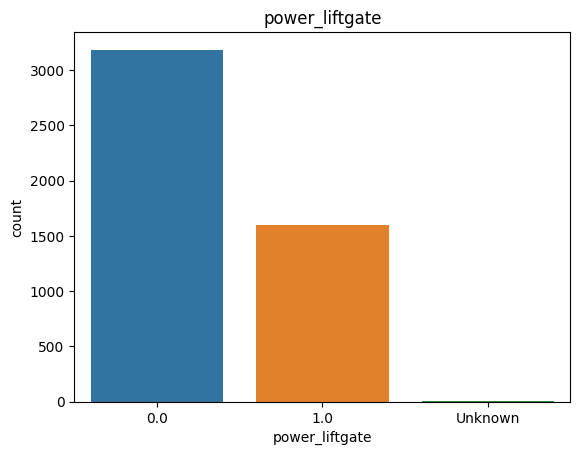

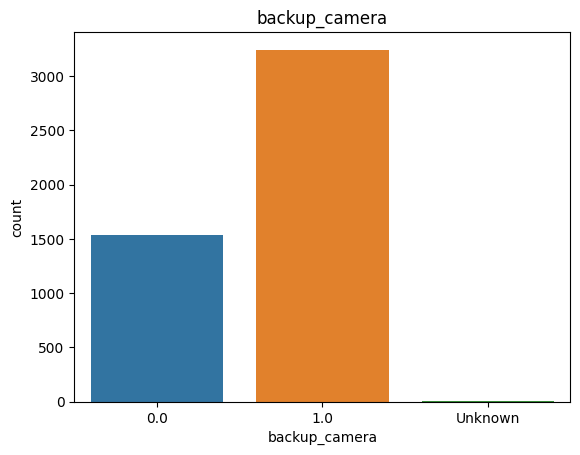

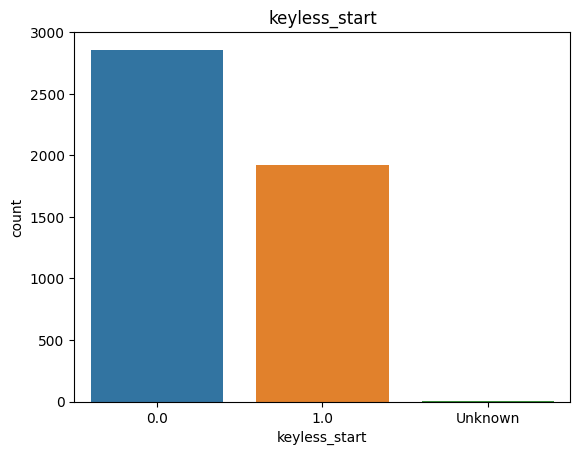

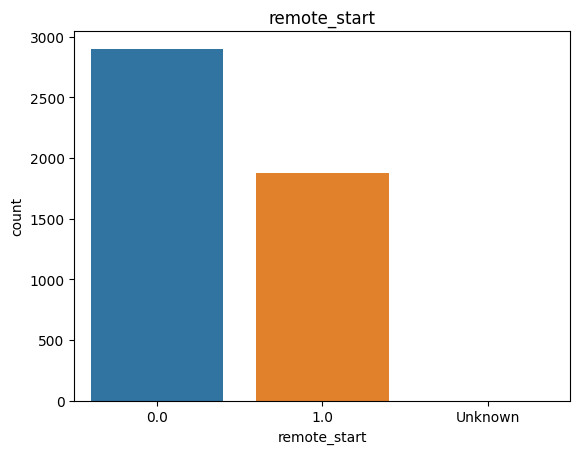

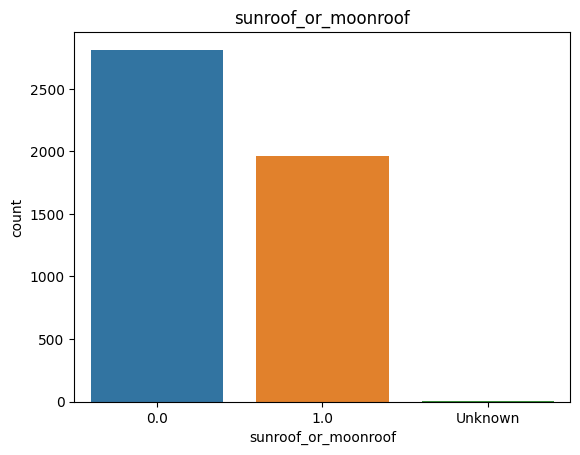

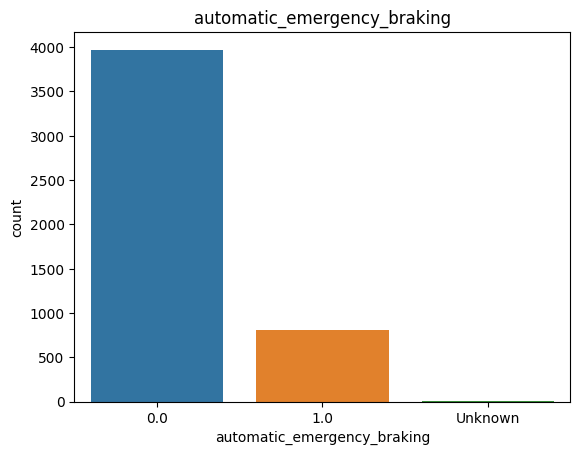

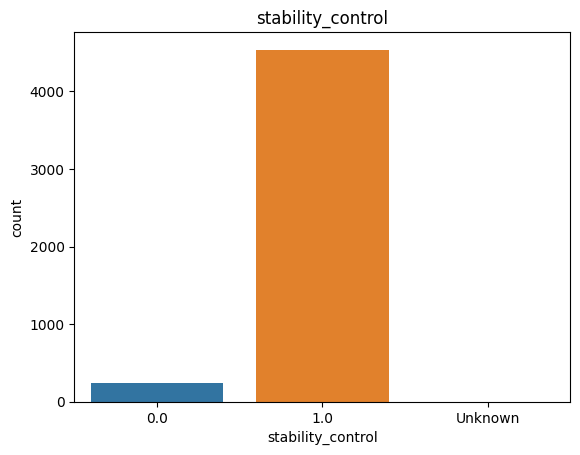

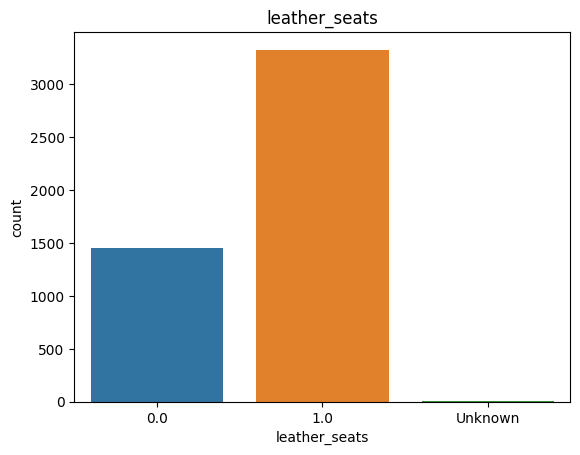

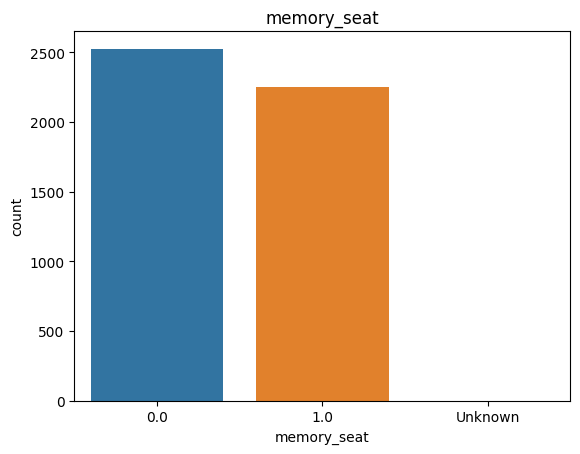

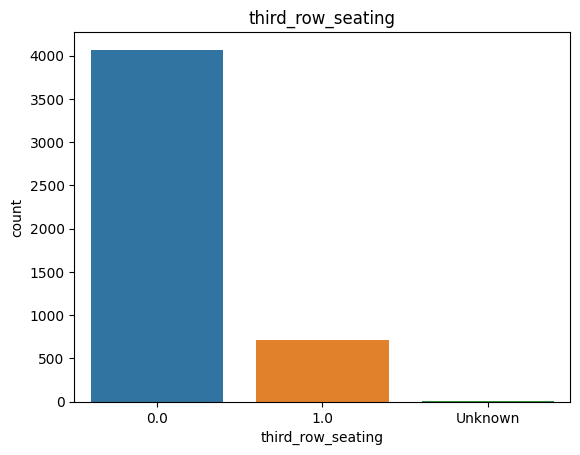

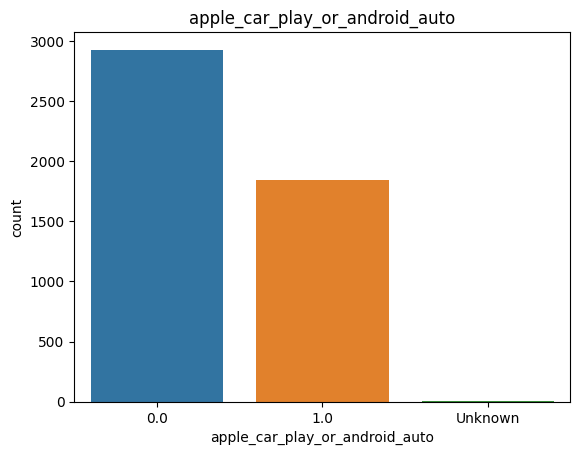

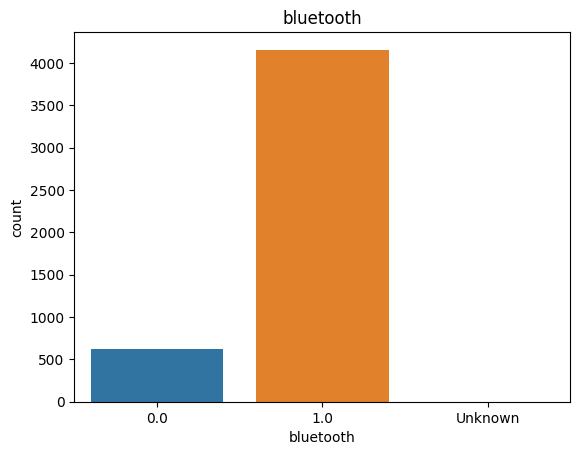

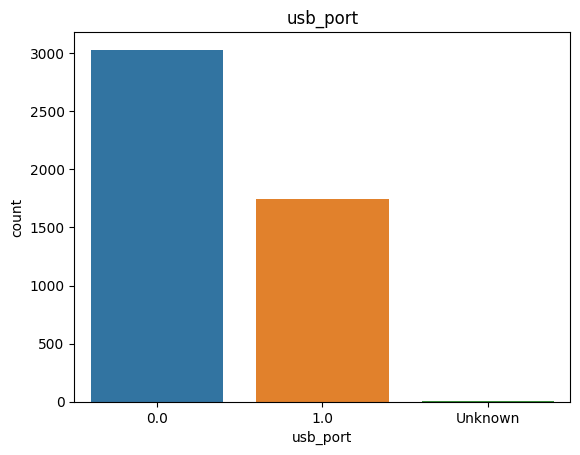

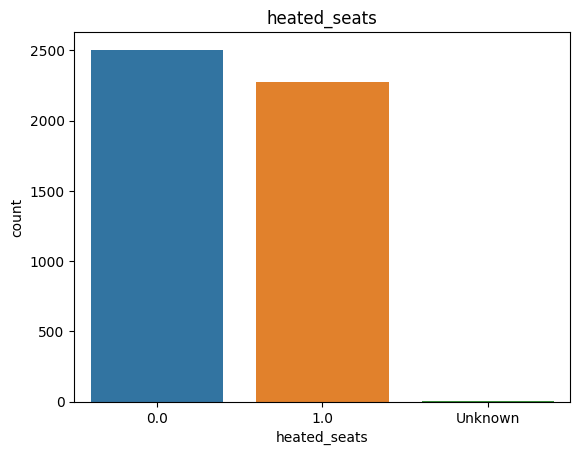

In [18]:
for i in categorical_features:
    ax=sns.countplot(x=df[i], data=df)
    plt.title(i)
    plt.show()

In [19]:
"ot Priced" in df['price'].values

False

In [20]:
df.loc[(df['price'] == 'ot Priced') | (df["price"].isnull()), 'price'] = 0
"ot Priced" in df['price'].values

False

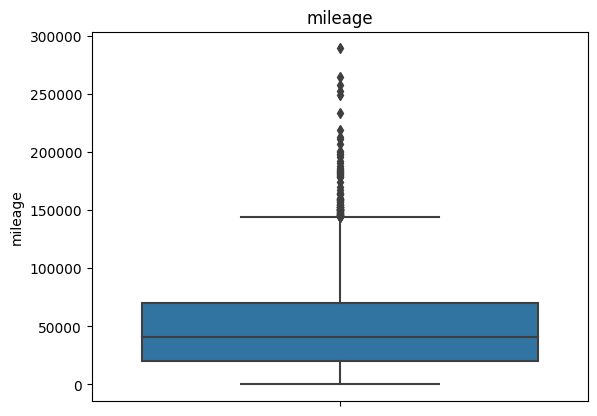

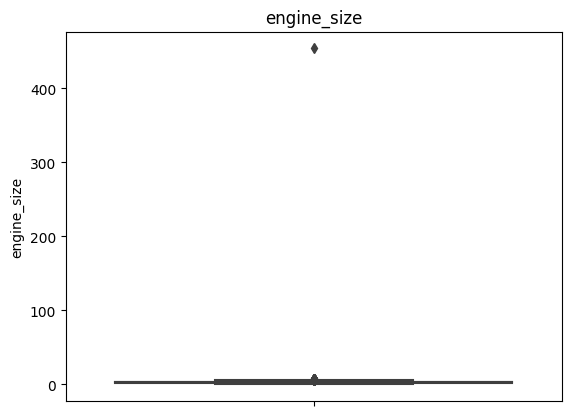

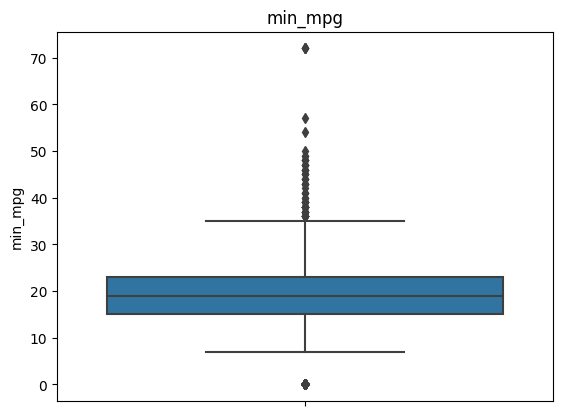

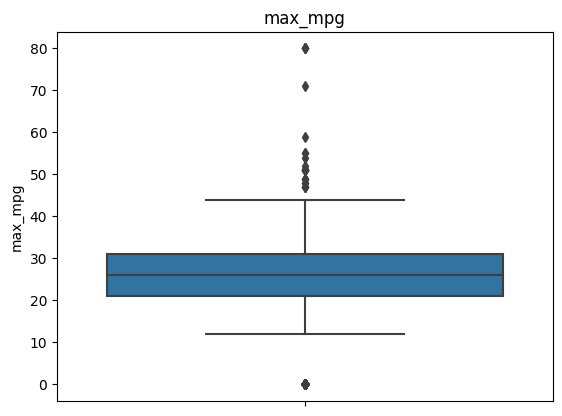

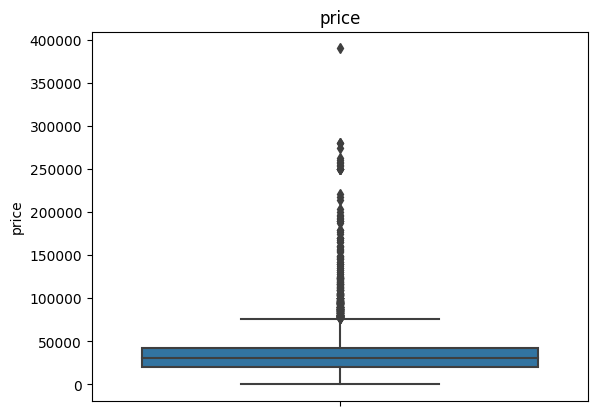

In [21]:
for i in numerical_features:
    df[i] = pd.to_numeric(df[i])
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

In [22]:
#Finding upper and lower limt for df['engine_size']
Inter_Quartile_Range = df['engine_size'].quantile(0.75) - df['engine_size'].quantile(0.25)
lower_boundary = df['engine_size'].quantile(0.25) - (Inter_Quartile_Range * 1.5)
upper_boundary = df['engine_size'].quantile(0.75) + (Inter_Quartile_Range * 1.5)
df['engine_size']= np.where(df['engine_size'] > upper_boundary, upper_boundary,np.where(df['engine_size'] < lower_boundary, lower_boundary,df['engine_size']))


In [23]:
df.isna().sum()

brand                             0
model                             0
year                              0
mileage                           1
engine                            0
engine_size                       1
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                           1
max_mpg                           1
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof_or_moonroof               0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                 

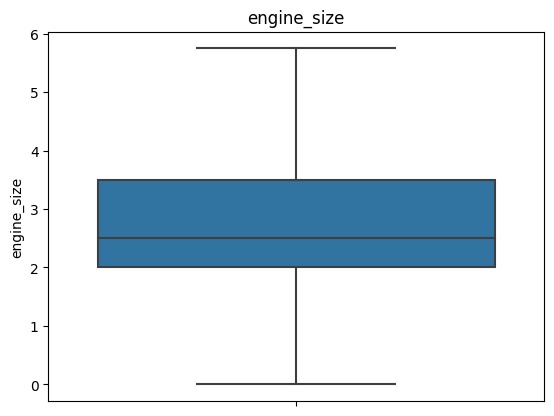

In [24]:
sns.boxplot(y=df['engine_size'])
plt.title('engine_size')
plt.show()

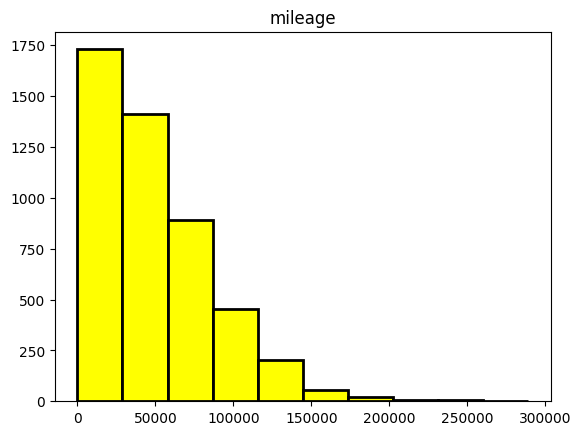

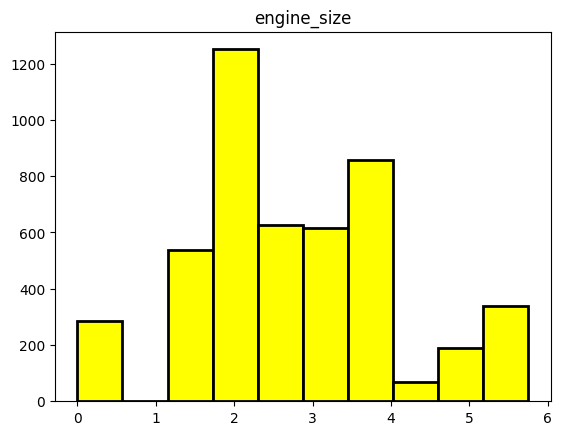

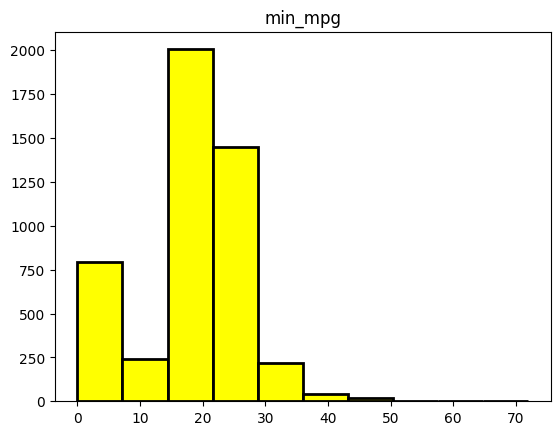

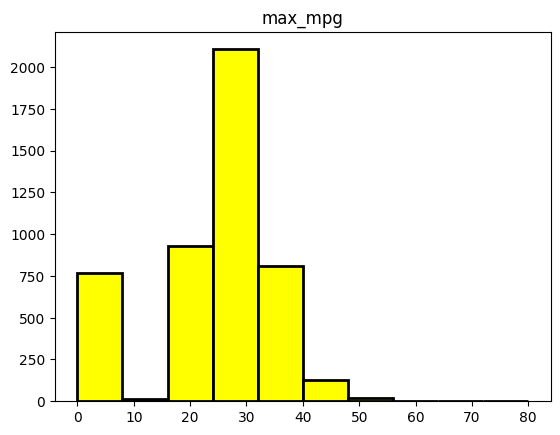

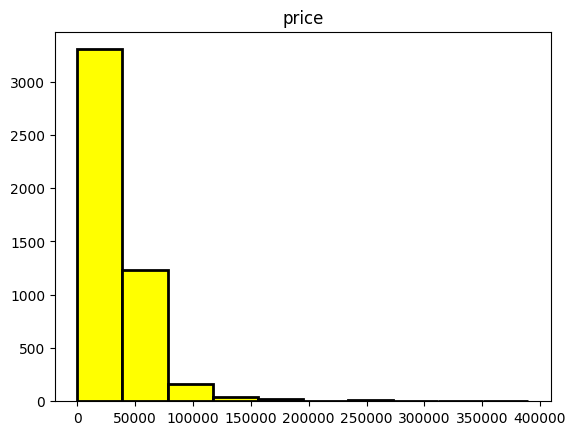

In [25]:
for i in numerical_features:
    plt.hist(df[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

In [26]:
df.isna().sum()

brand                             0
model                             0
year                              0
mileage                           1
engine                            0
engine_size                       1
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                           1
max_mpg                           1
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof_or_moonroof               0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                 

In [27]:
df['mileage']=round(np.sqrt(df['mileage']),1)
df['price']=round(np.sqrt(df['price']),1)

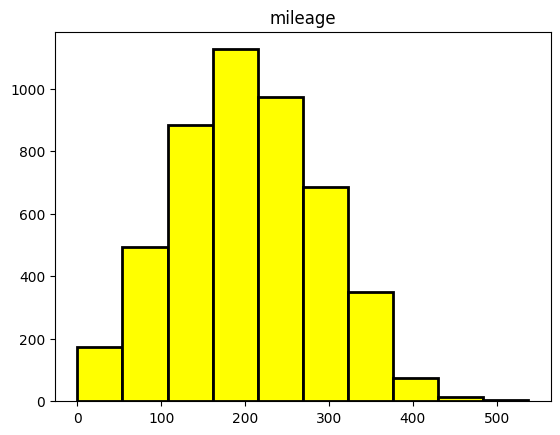

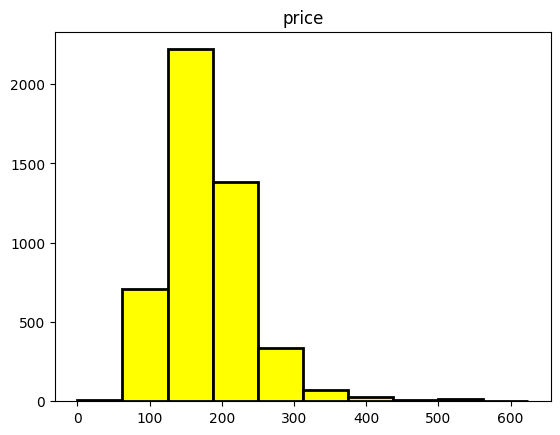

In [28]:
for i in ['mileage','price']:
    plt.hist(df[i], color='yellow', edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

In [29]:
df['memory_seat'].value_counts()

0.0        2526
1.0        2253
Unknown       1
Name: memory_seat, dtype: int64

In [30]:
le = {}
for i in text_features:
    le[i] = preprocessing.LabelEncoder()
    le[i].fit(df[i])
    df[i] = le[i].transform(df[i])
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play_or_android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,5,2,41,175.6,18,1.4,21,1,3,2,...,0,0,0,0,0,0,0,42,92,143.2
2,5,48,34,204.9,555,0.0,62,1,3,1,...,0,0,0,0,1,0,0,337,975,100.0
3,5,46,0,0.0,555,0.0,93,0,5,3,...,0,0,0,0,0,0,0,437,174,141.2
4,22,1046,43,141.9,555,0.0,79,0,5,2,...,0,0,0,0,0,1,0,30,368,170.0
5,5,57,34,350.3,555,0.0,83,0,5,1,...,0,0,0,0,1,0,0,42,81,93.5


In [31]:
#le['brand'] = preprocessing.LabelEncoder()
#df['brand'] = le.fit_transform(df['brand'])
print(le['brand'].transform(['FIAT']))

[5]


In [32]:
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play_or_android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,5,2,41,175.6,18,1.4,21,1,3,2,...,0,0,0,0,0,0,0,42,92,143.2
2,5,48,34,204.9,555,0.0,62,1,3,1,...,0,0,0,0,1,0,0,337,975,100.0
3,5,46,0,0.0,555,0.0,93,0,5,3,...,0,0,0,0,0,0,0,437,174,141.2
4,22,1046,43,141.9,555,0.0,79,0,5,2,...,0,0,0,0,0,1,0,30,368,170.0
5,5,57,34,350.3,555,0.0,83,0,5,1,...,0,0,0,0,1,0,0,42,81,93.5


In [33]:
df = df.dropna()

<Axes: >

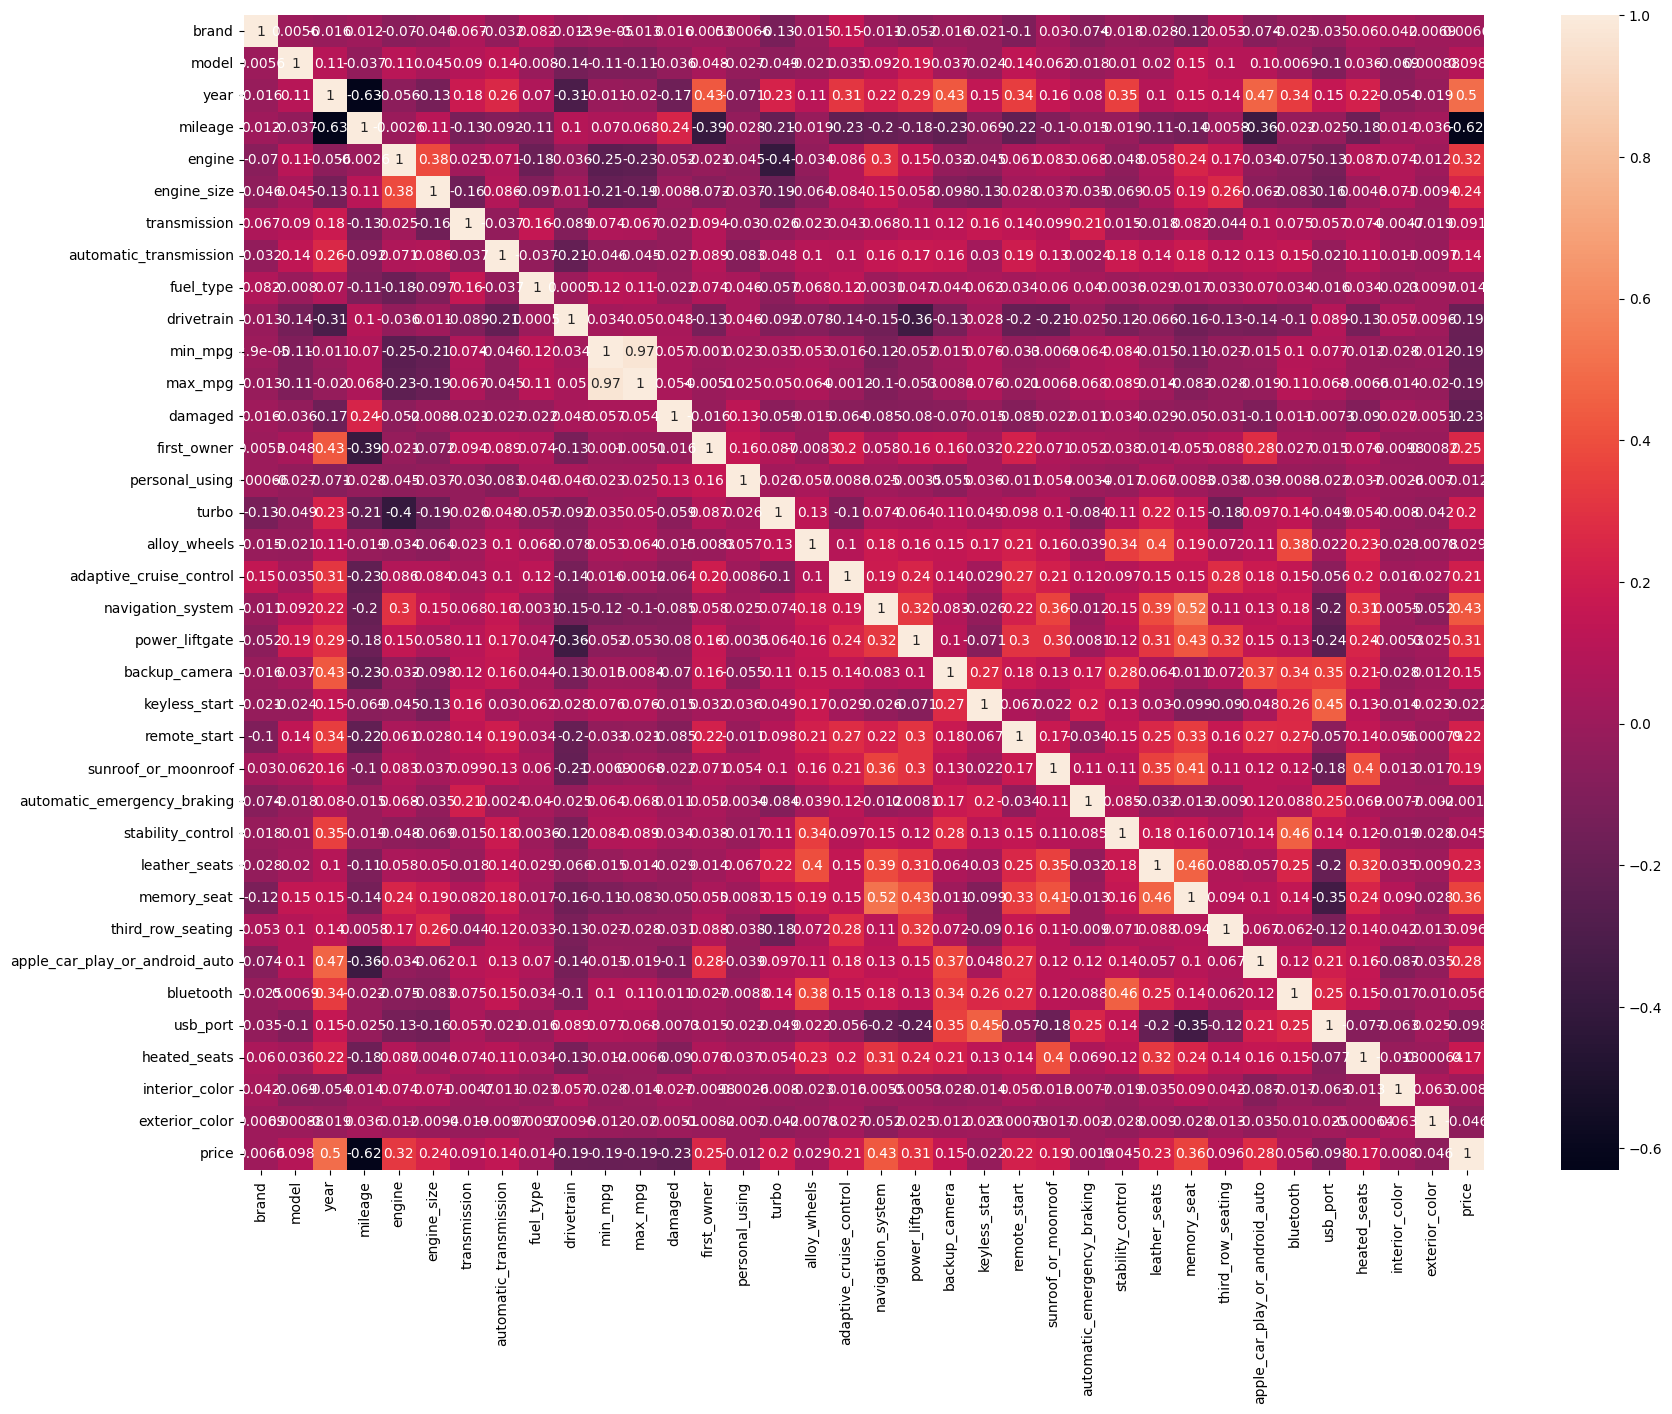

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [35]:
X = df.drop(['min_mpg','automatic_emergency_braking',
'alloy_wheels','keyless_start','stability_control',
'third_row_seating','bluetooth','usb_port','price'], axis=1)
y = df['price']

In [36]:
s = StandardScaler()
X = s.fit_transform(X)

In [38]:
X = pd.DataFrame(X,columns=df.drop(['min_mpg','automatic_emergency_braking',
'alloy_wheels','keyless_start','stability_control',
'third_row_seating','bluetooth','usb_port','price'], axis=1).columns)
X.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,power_liftgate,backup_camera,remote_start,sunroof_or_moonroof,leather_seats,memory_seat,apple_car_play_or_android_auto,heated_seats,interior_color,exterior_color
0,-0.938018,-1.704643,0.403612,-0.326833,-1.297050,-0.994666,-1.060953,0.296424,0.082931,1.866606,...,-0.70744,-1.453738,-0.804589,-0.835640,-1.512215,-0.944417,-0.794041,-0.952777,-0.851920,-1.318188
1,-0.938018,-1.619688,-0.899798,0.013813,2.391567,-2.053590,0.997652,0.296424,0.082931,0.539347,...,-0.70744,-1.453738,-0.804589,-0.835640,-1.512215,-0.944417,-0.794041,-0.952777,1.100345,1.481300
2,-0.938018,-1.623381,-7.230644,-2.368384,2.391567,-2.053590,2.554159,-3.373548,4.006956,3.193866,...,-0.70744,-1.453738,-0.804589,-0.835640,-1.512215,-0.944417,-0.794041,-0.952777,1.762130,-1.058212
3,1.454079,0.223479,0.776014,-0.718634,2.391567,-2.053590,1.851220,-3.373548,4.006956,1.866606,...,-0.70744,0.687882,-0.804589,1.196688,-1.512215,-0.944417,-0.794041,-0.952777,-0.931335,-0.443149
4,-0.938018,-1.603066,-0.899798,1.704255,2.391567,-2.053590,2.052060,-3.373548,4.006956,0.539347,...,-0.70744,0.687882,-0.804589,-0.835640,-1.512215,-0.944417,-0.794041,-0.952777,-0.851920,-1.353062


In [39]:
X = X.dropna()

In [40]:
X.isna().sum()

brand                             0
model                             0
year                              0
mileage                           0
engine                            0
engine_size                       0
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
max_mpg                           0
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
remote_start                      0
sunroof_or_moonroof               0
leather_seats                     0
memory_seat                       0
apple_car_play_or_android_auto    0
heated_seats                      0
interior_color                    0
exterior_color                    0
dtype: int64

In [74]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.15, random_state=42)  

np.shape(y_train)

(4062,)

In [75]:
X.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'max_mpg', 'damaged', 'first_owner', 'personal_using', 'turbo',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'remote_start', 'sunroof_or_moonroof', 'leather_seats',
       'memory_seat', 'apple_car_play_or_android_auto', 'heated_seats',
       'interior_color', 'exterior_color'],
      dtype='object')

In [122]:
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import xgboost as xgb
# initializing all the model objects with default parameters
model = CatBoostRegressor(silent=True)
# training all the model on the training dataset
model.fit(x_train, y_train)
# predicting the output on the validation dataset
y_pred = model.predict(x_train)
y_pred2 = model.predict(x_val)

# printing the root mean squared error between real value and predicted value
print('Accuracy of model on train set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of model on test set: {:.2f}'.format(model.score(x_val, y_val)))
print('mse of model on train set: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))
print('mse of model on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_pred2))))

Accuracy of model on train set: 0.97
Accuracy of model on test set: 0.85
mse of model on train set: 10.38
mse of model on test set: 22.93


In [123]:
input = ['FIAT',	'124 Spider Lusso',	'2020',	'30830','1.4L I4 16V MPFI SOHC Turbo',	'1.4',	'6-Speed Automatic',
	'1',	'Gasoline',	'Rear-wheel Drive',	'36','0','0','1','1','1','0','0','0','1','1','0','0','0','1',
	'Saddle','Forte Black Metallic']

In [124]:
input_text_features = [
    'brand','model','year','engine',"transmission","automatic_transmission",
  "fuel_type", "drivetrain","damaged", "first_owner", "personal_using",
    "turbo", "adaptive_cruise_control", "navigation_system",
    "power_liftgate", "backup_camera", "remote_start",
    "sunroof_or_moonroof",
    "leather_seats", "memory_seat", "apple_car_play_or_android_auto",
    "heated_seats","exterior_color","interior_color"
]

In [125]:
  input_data = pd.DataFrame({
            'brand': ['FIAT'],
            'model': ['124 Spider Lusso'],
            'year': ['2020'],
            'mileage': ['30830'],
            'engine': ['1.4L I4 16V MPFI SOHC Turbo'],
            'engine_size': ['1.4'],
            'transmission': ['6-Speed Automatic'],
            'automatic_transmission': ['1.0'],
            'fuel_type': ['Gasoline'],
            'drivetrain': ['Rear-wheel Drive'],
            'max_mpg': ['36'],
            'damaged': ['0.0'],
            'first_owner': ['0.0'],
            'personal_using': ['1.0'],
            'turbo': ['1.0'],
            'adaptive_cruise_control': ['0.0'],
            'navigation_system': ['0.0'],
            'power_liftgate': ['0.0'],
            'backup_camera': ['0.0'],
            'remote_start': ['1.0'],
            'sunroof_or_moonroof': ['1.0'],
            'leather_seats': ['0.0'],
            'memory_seat': ['0.0'],
            'apple_car_play_or_android_auto': ['0.0'],
            'heated_seats': ['1.0'],
            'interior_color': ['Saddle'],
            'exterior_color': ['Forte Black Metallic']
        })

In [126]:
input_data.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,power_liftgate,backup_camera,remote_start,sunroof_or_moonroof,leather_seats,memory_seat,apple_car_play_or_android_auto,heated_seats,interior_color,exterior_color
0,FIAT,124 Spider Lusso,2020,30830,1.4L I4 16V MPFI SOHC Turbo,1.4,6-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Saddle,Forte Black Metallic


In [127]:
input_data_le = input_data
for i in input_text_features:
    input_data_le[i] = le[i].transform(input_data[i])

In [128]:
input_data = s.transform(input_data)

In [129]:
input_data

array([[-9.38018377e-01, -1.70464333e+00,  4.03611620e-01,
         3.56065709e+02, -1.29704978e+00, -9.94666295e-01,
        -1.06095306e+00,  2.96423787e-01,  8.29308605e-02,
         1.86660644e+00,  1.07084885e+00, -5.35869154e-01,
        -1.02911882e+00,  5.72915894e-01,  1.20866252e+00,
        -5.87418515e-01, -9.97700906e-01, -7.07439720e-01,
        -1.45373830e+00,  1.24287105e+00,  1.19668754e+00,
        -1.51221528e+00, -9.44417276e-01, -7.94041268e-01,
         1.04956330e+00,  1.40476636e+00, -4.62171983e-01]])

In [130]:
model.predict(input_data)**2

array([14693.30691043])

In [132]:
import joblib 
  
  
# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl')
joblib.dump(s, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']